# Part 1: Data Preprocessing

In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical, normalize
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.callbacks import TensorBoard
from time import time

Using TensorFlow backend.


In [2]:
# importing the mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Exception: URL fetch failure on https://s3.amazonaws.com/img-datasets/mnist.npz: None -- [Errno 11001] getaddrinfo failed

In [ ]:
# normalizing the features(X_train, X_test)
X_train = normalize(X_train, axis = 1).reshape(X_train.shape[0], 28, 28, 1)
X_test = normalize(X_test, axis = 1).reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# convert the labels(y_train and y_test) to one hot encoder
num_classes = 10
y_train = to_categorical(y_train, num_classes = num_classes)
y_test = to_categorical(y_test, num_classes = num_classes)

# Part 2: Building and Training CNN model

In [0]:
# creating the CNN model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
_________________________________________________________________
dens

In [0]:
# compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
# instantiat TensorBoard
NAME = 'mnist_cnn_update-{}'.format(time())
tensorboard = TensorBoard(log_dir='/logs{}'.format(NAME))

In [0]:
# fitting the training data to the model
history = model.fit(X_train, y_train, epochs = 5, validation_split = 0.1, callbacks = [tensorboard])

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 59s 1ms/step - loss: 0.1720 - acc: 0.9478 - val_loss: 0.0578 - val_acc: 0.9845
Epoch 2/5
54000/54000 [==============================] - 58s 1ms/step - loss: 0.0587 - acc: 0.9814 - val_loss: 0.0497 - val_acc: 0.9860
Epoch 3/5
54000/54000 [==============================] - 59s 1ms/step - loss: 0.0404 - acc: 0.9877 - val_loss: 0.0392 - val_acc: 0.9880
Epoch 4/5
54000/54000 [==============================] - 58s 1ms/step - loss: 0.0309 - acc: 0.9898 - val_loss: 0.0376 - val_acc: 0.9880
Epoch 5/5
54000/54000 [==============================] - 58s 1ms/step - loss: 0.0229 - acc: 0.9925 - val_loss: 0.0336 - val_acc: 0.9897


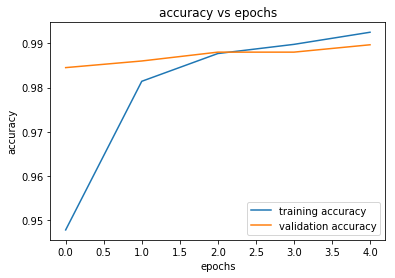

In [0]:
# visualizing the training and evaluation accuracy
plt.plot(np.arange(5), history.history['acc'])
plt.plot(np.arange(5), history.history['val_acc'])
plt.title('accuracy vs epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training accuracy', 'validation accuracy'])
plt.show()

In [0]:
# Test set evalutaion
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test loss: {test_loss:.3}')
print(f'test accuracy: {test_accuracy:.3}')

10000/10000 [==============================] - 4s 380us/step
test loss: 0.0311
test accuracy: 0.991


# Part 3: Prediction on sample image

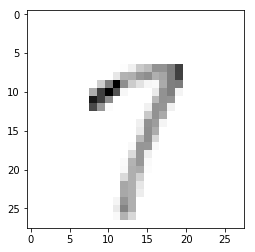

In [0]:
# visualizing the sample image to be predicted
sample_image = 666
plt.imshow(X_test[sample_image].reshape(28, 28), cmap = 'Greys')
plt.show()

In [0]:
# make prediction with the trained model
np.argmax(model.predict(X_test[None, sample_image]))

7